In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline
from scipy import stats

guns = pd.read_csv('gun_data - Sheet1.csv')

#to_drop = ['Guam', 'Puerto Rico', 'Virgin Islands', 'District of Colombia', 'Mariana Islands']
#I'm sure there is a more efficient way to do this, but this was the first method that worked for me
guns = guns[guns.state!= 'Guam']
guns = guns[guns.state!= 'Puerto Rico']
guns = guns[guns.state!= 'Virgin Islands']
guns = guns[guns.state!= 'District of Columbia']
guns = guns[guns.state!= 'Mariana Islands']

guns.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [586]:
guns.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


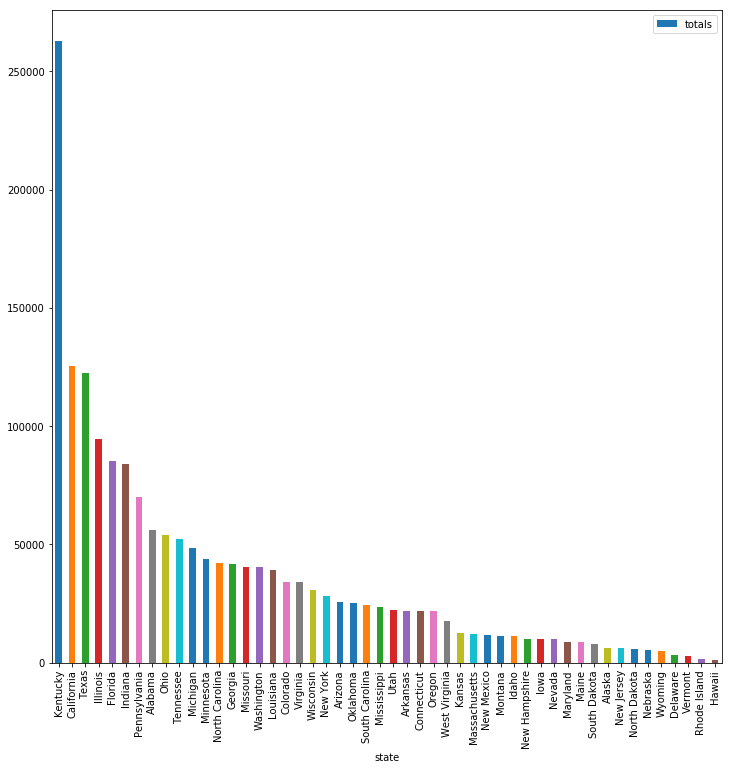

In [102]:
#compares sales of all states for September 2017
guns['month'] = pd.to_datetime(guns['month'])

recent_month = guns[guns['month']== '2015-09-01']
recent_month = recent_month.sort_values(by=['totals'],ascending = False)

recent_month.plot(x = 'state', y = 'totals', kind = 'bar', figsize=(12,12));
#plt.xticks(rotation = 45)

In [128]:
#find state that buys the most/least handguns or long guns 
#per capita gun ownership for all states
#merge the census data and the existing guns sheet
"""your_state = input("Which state's firearm checks would you like to compare to the national average? ")
your_state = your_state.title()
"""
your_state = 'Alaska'
def state_slope(your_state):
    your_state = your_state.title()
    state = guns[guns['state'] == your_state]
    state = state.groupby('month').totals.mean()
    state = state.rolling(window=12).mean()
    state = state.dropna()
    state = pd.DataFrame(data = state)
    state = state.reset_index()
    state['numbers'] = state.index+1
    return np.polyfit(state.numbers, state.totals, deg=1)[0]

state_slope(your_state)

24.955981703759257

Which two state's firearm checks would you like to compare to the national average:    california
Second Statecolorado
California was purchasing an average of 476.000000 guns per month.
Colorado was purchasing an average of 112.000000 guns per month.


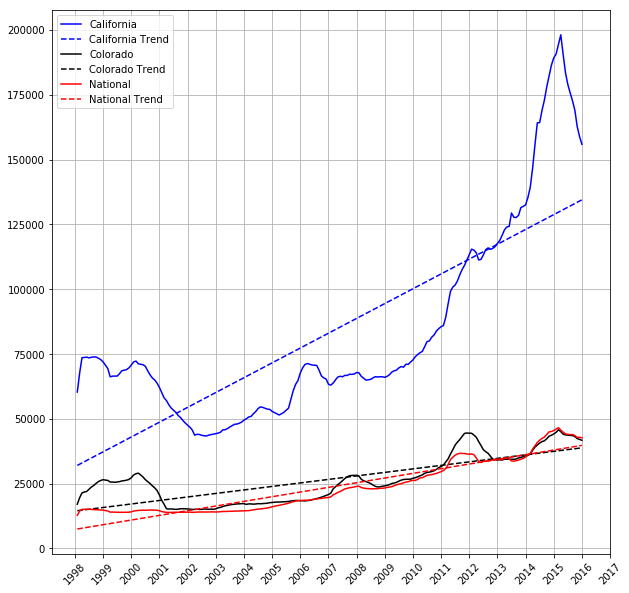

In [577]:
your_state = input("Which two state's firearm checks would you like to compare to the national average:    ")
your_state = your_state.title()
your_state2 = input("Second State")
your_state2 = your_state2.title()

avg_guns = guns.groupby('month').totals.mean()
avg_guns = avg_guns.rolling(window=12).mean()
avg_guns = avg_guns.dropna()
avg_guns = pd.DataFrame(data=avg_guns)
avg_guns = avg_guns.reset_index()
avg_guns['numerical'] = avg_guns.index + 1

state = guns[guns['state'] == your_state2]
state = state.groupby(['month']).totals.mean()
state = state.rolling(window=12).mean()
state = state.dropna()
state_avg2 = pd.DataFrame(data=state)
state_avg2 = state_avg2.reset_index()
state_avg2['numerical'] = state_avg2.index + 1

state = guns[guns['state'] == your_state]
state = state.groupby(['month']).totals.mean()
state = state.rolling(window=12).mean()
state = state.dropna()
state_avg = pd.DataFrame(data=state)
state_avg = state_avg.reset_index()
state_avg['numerical'] = state_avg.index + 1

numguns = int(np.polyfit(state_avg.numerical, state_avg.totals, deg=1)[0])

print('%s was purchasing an average of %f guns per month.' %(your_state, numguns))
print('%s was purchasing an average of %f guns per month.' %(your_state2, int(np.polyfit(state_avg2.numerical, state_avg2.totals, deg=1)[0])))

plt.rcParams['figure.figsize'] = (10,10)

plt.plot(state_avg.numerical, state_avg.totals, label = your_state, color = 'blue');
state_lobf = np.polyfit(state_avg.numerical, state_avg.totals, deg=1)
plt.plot(state_avg.numerical, np.polyval(state_lobf, state_avg.numerical),color = 'blue', linestyle = 'dashed', label = '%s Trend' % your_state);

plt.plot(state_avg2.numerical, state_avg2.totals, label = your_state2, color = 'black');
state_lobf = np.polyfit(state_avg2.numerical, state_avg2.totals, deg=1)
plt.plot(state_avg2.numerical, np.polyval(state_lobf, state_avg2.numerical),color = 'black', linestyle = 'dashed', label = '%s Trend' % your_state2);

plt.plot(avg_guns.numerical, avg_guns.totals, label = 'National', color = 'red');
usa_lobf = np.polyfit(avg_guns.numerical, avg_guns.totals, deg = 1)
plt.plot(avg_guns.numerical, np.polyval(usa_lobf, avg_guns.numerical),color = 'red', linestyle = 'dashed', label = 'National Trend');

plt.legend(loc = 'upper left');


num_months=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228]
years = ['1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006','2007','2008','2009', '2010','2011','2012','2013','2014','2015','2016','2017']
plt.xticks(num_months, years, rotation = 45);
plt.grid()



In [518]:
#curating the census data
#merge the census data and the existing guns sheet
census = pd.read_csv('US-census-data.csv')

census = pd.DataFrame(data = census.T)
census.columns = census.iloc[0]
census = census.drop(census.index[[0,1]])
census = census.reset_index()
census = census.rename(columns ={'index':'state', 'census.Population_estimates_July_1':'Population'})

#remove columns that have null values in them and turn the series into a dataframe again
census = census.dropna(axis=1)
census = pd.DataFrame(data = census)

census = census.drop(census.columns[[5,6,7,8,9,10,11,12,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
                                     41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]], axis = 1)


census.columns = census.columns.str[:30]
census = census.rename(columns ={'census.Population_estimates_July_1':'Population'})


census.rename(columns = lambda x: x.strip().replace(" ","_"), inplace = True)
census.rename(columns = lambda x: x.strip().replace(",",""), inplace = True)

census['Population_estimates_July_1'] = census['Population_estimates_July_1'].str.replace(",","")
census['Population_estimates_base_Apr'] = census['Population_estimates_base_Apr'].str.replace(",","")
census['Veterans_2011-2015'] = census['Veterans_2011-2015'].str.replace(",","")

census['Veterans_2011-2015'] = census['Veterans_2011-2015'].astype(int)
census['Population_estimates_base_Apr'] = census['Population_estimates_base_Apr'].astype(int)
census['Population_estimates_July_1'] = census['Population_estimates_July_1'].astype(int)
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
state                             50 non-null object
Population_estimates_July_1       50 non-null int64
Population_estimates_base_Apr     50 non-null int64
Population_percent_change_-_A     50 non-null object
Population_Census_April_1_2       50 non-null object
White_alone_percent_July_1        50 non-null object
Black_or_African_American_alon    50 non-null object
American_Indian_and_Alaska_Nat    50 non-null object
Asian_alone_percent_July_1        50 non-null object
Native_Hawaiian_and_Other_Paci    50 non-null object
Two_or_More_Races_percent_Ju      50 non-null object
Hispanic_or_Latino_percent_J      50 non-null object
White_alone_not_Hispanic_or_L     50 non-null object
Veterans_2011-2015                50 non-null int64
dtypes: int64(3), object(11)
memory usage: 5.5+ KB


In [591]:
#sum_rows = #add everything from each state together to find total gun permits 
#guns['sum_columns'] = guns.fillna(0) + guns[['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other']].sum()
#guns['month'] = 
#test_month = guns.groupby(['month', 'state', 'totals']).sum()
calculations = pd.DataFrame(columns = ['all_totals', 'long_guns', 'handguns'])
gun_totals = guns.groupby('state').totals.sum()
calculations['all_totals'] = gun_totals


by_state = guns.groupby('state').sum()
handgun_totals = by_state.loc[:, by_state.columns.str.contains('handgun')]
handgun_totals = handgun_totals.sum(axis=1)
calculations['handguns'] = handgun_totals
calculations.handguns = calculations.handguns.astype(int)

long_totals = by_state.loc[:, by_state.columns.str.contains('long')]
long_totals = long_totals.sum(axis=1)
calculations['long_guns'] = long_totals
calculations.long_guns = calculations.long_guns.astype(int)

#gpc = 

calculations.reset_index(inplace= True)
#by_state
calculations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
state         50 non-null object
all_totals    50 non-null int64
long_guns     50 non-null int64
handguns      50 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [600]:
#create final results df with data for 50 states in alphabetical
guns_final = pd.DataFrame(columns=['state', 'guns_per_month', 'population_2016', 'num_vets', 'proportion_of_vets',
                                   'all_guns', 'long_barrel', 'handguns',
                                    'guns_per_capita', 'handguns_per_capita', 'long_guns_per_capita'])
guns_final['state'] = census['state']
guns_final['guns_per_month'] = fifty_slopes['slope']
guns_final['population_2016'] = census['Population_estimates_July_1']
guns_final['num_vets'] = census['Veterans_2011-2015']
guns_final['all_guns'] = calculations['all_totals']
guns_final['handguns'] = calculations['handguns']
guns_final['long_barrel'] = calculations['long_guns']
guns_final['guns_per_capita'] = calculations['all_totals']/guns_final['population_2016']
guns_final['handguns_per_capita'] = calculations['handguns']/guns_final['population_2016']
guns_final['long_guns_per_capita'] = calculations['long_guns']/guns_final['population_2016']
guns_final['proportion_of_vets'] = census['Veterans_2011-2015']/census['Population_estimates_July_1']


guns_final[guns_final.state.str.contains('Kentucky') == False]
guns_final


,state,guns_per_month,population_2016,num_vets,proportion_of_vets,all_guns,long_barrel,handguns,guns_per_capita,handguns_per_capita,long_guns_per_capita
0,Alabama,188.319532,4863300,363170,0.074676,6706079,2981661,2530921,1.378915,0.520412,0.613094
1,Alaska,24.955982,741894,69323,0.093441,1137643,611735,467527,1.533431,0.630180,0.824558
2,Arizona,103.998022,6931071,505794,0.072975,4425714,1595312,1964383,0.638532,0.283417,0.230168
3,Arkansas,46.723920,2988248,220953,0.073941,3752633,2036172,1117592,1.255797,0.373996,0.681393
4,California,476.421079,39250017,1777410,0.045284,19014063,5968052,5947744,0.484435,0.151535,0.152052
5,Colorado,112.767328,5540545,391725,0.070702,6058482,2727236,2533992,1.093481,0.457354,0.492232
6,Connecticut,100.074786,3576452,199331,0.055734,3168126,638158,879332,0.885829,0.245867,0.178433
7,Delaware,15.283568,952065,71213,0.074798,491369,243798,210850,0.516109,0.221466,0.256073
8,Florida,438.453003,20612439,1507738,0.073147,11695777,3970995,6154946,0.567414,0.298603,0.192650
9,Georgia,111.572187,10310371,670617,0.065043,7209942,2546095,2346761,0.699290,0.227612,0.246945


R Squared value = 0.033859


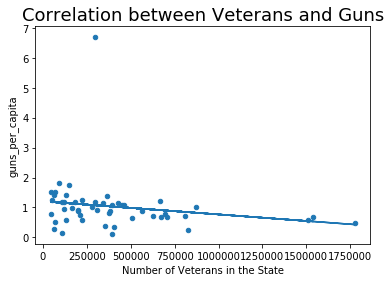

In [601]:
guns_final.plot(x = 'num_vets', y = 'guns_per_capita', kind = 'scatter');
vets_guns = np.polyfit(guns_final.num_vets, guns_final.guns_per_capita, deg = 1)
plt.plot(guns_final.num_vets, np.polyval(vets_guns, guns_final.num_vets));
y_title = 'Number of Guns in the state'
#there is a correlation between number of veterans and the 
plt.xlabel('Number of Veterans in the State')
plt.title('Correlation between Veterans and Guns', fontsize = 18)
#plt.ylabel('Number of Guns in the State')
slope, intercept, r_value, p_value, std_err = stats.linregress(guns_final['num_vets'], guns_final['guns_per_capita'])
r_value = r_value**2
print('R Squared value = %f' %r_value)

TypeError: 'str' object is not callable

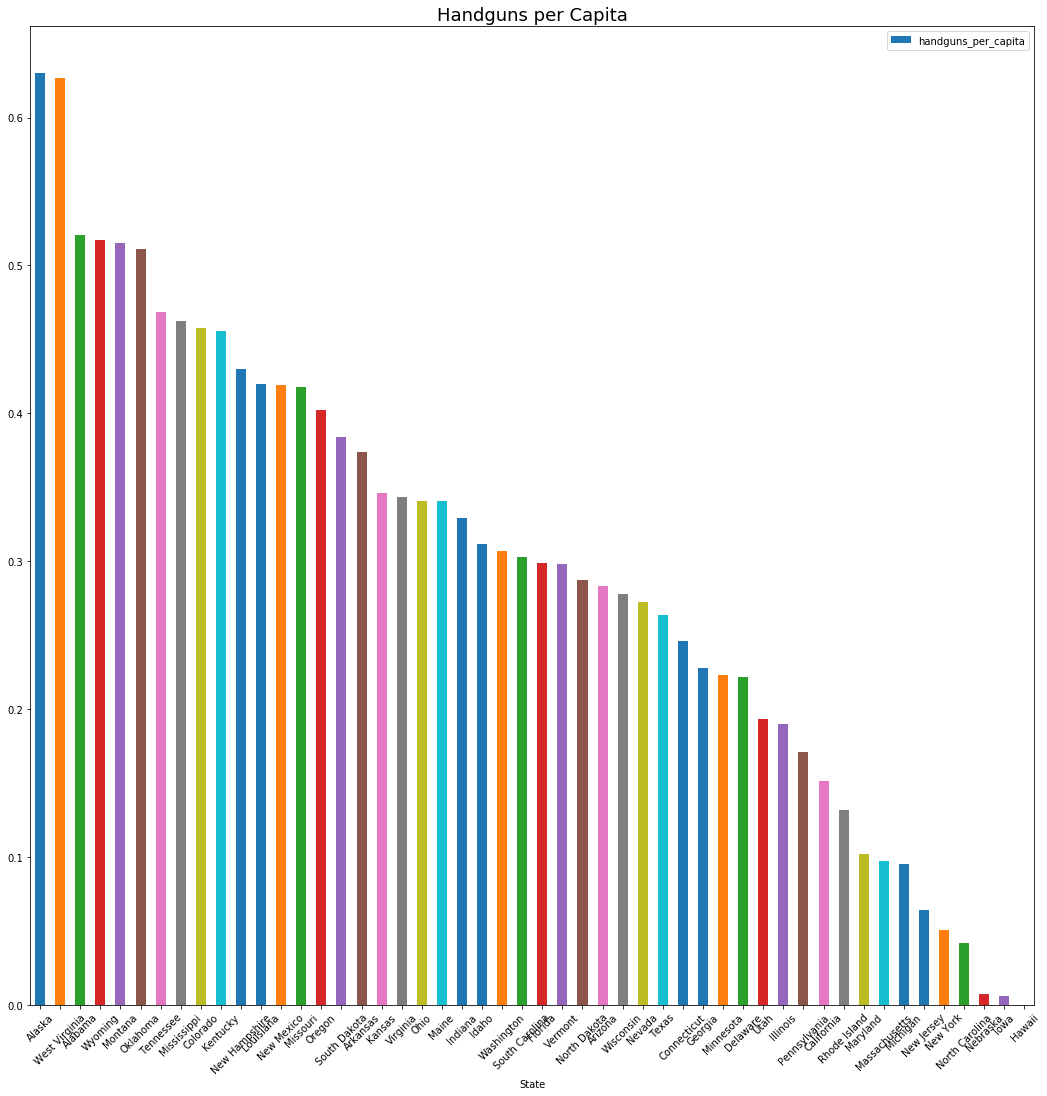

In [575]:
hand_final = guns_final.sort_values(by = 'handguns_per_capita', ascending = False)
plt.rcParams['figure.figsize'] = (18,18)
hand_final.plot(x = 'state', y = 'handguns_per_capita', kind = 'bar');
plt.xticks(rotation =45)
plt.xlabel('State')
plt.title('Handguns per Capita', fontsize = 18)
plt.ylabel('Handguns per Capita')

Text(0.5,1,'Long Guns per Capita')

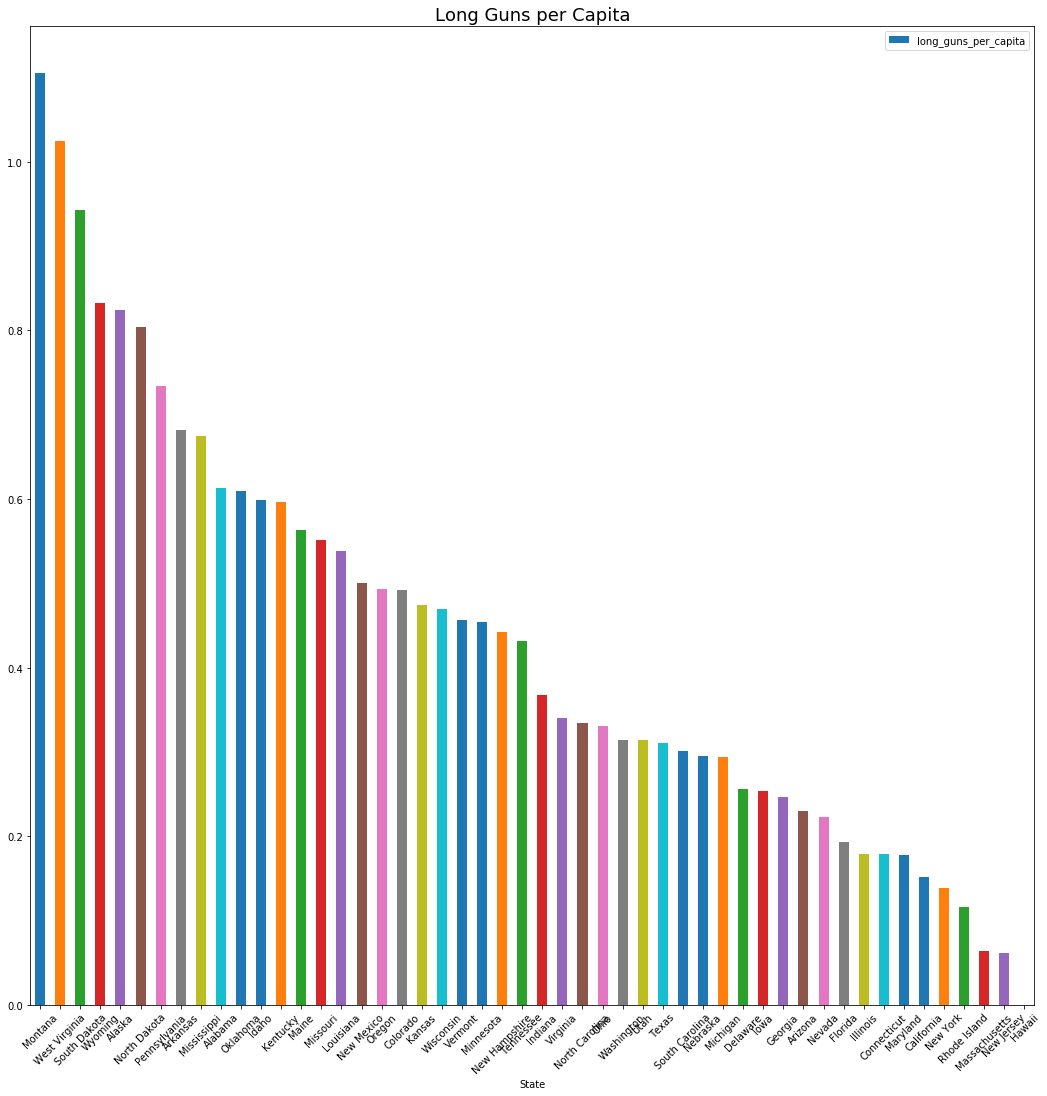

In [574]:
long_guns_capita = guns_final.sort_values(by= 'long_guns_per_capita', ascending = False)
plt.rcParams['figure.figsize'] = (18,18)
long_guns_capita.plot(x = 'state', y = 'long_guns_per_capita', kind = 'bar');
plt.xlabel('State')
plt.xticks(rotation = 45)
plt.title('Long Guns per Capita', fontsize = 18)

Which two state's firearm checks would you like to compare to the national average:    iowa
Second State:     missouri
Iowa was purchasing an average of 37.000000 guns per month.
Missouri was purchasing an average of 190.000000 guns per month.


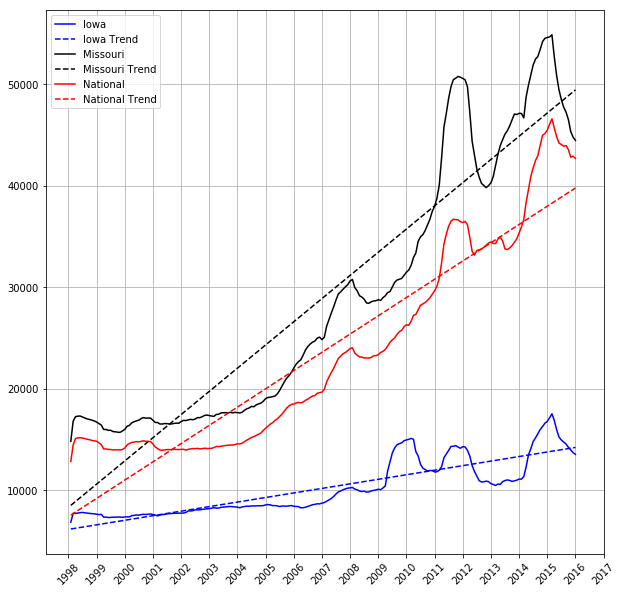

In [590]:
#national trend in gun purchases
your_state = input("Which two state's firearm checks would you like to compare to the national average:    ")
your_state = your_state.title()
your_state2 = input("Second State:     ")
your_state2 = your_state2.title()

avg_guns = guns.groupby('month').totals.mean()
avg_guns = avg_guns.rolling(window=12).mean()
avg_guns = avg_guns.dropna()
avg_guns = pd.DataFrame(data=avg_guns)
avg_guns = avg_guns.reset_index()
avg_guns['numerical'] = avg_guns.index + 1

state = guns[guns['state'] == your_state2]
state = state.groupby(['month']).totals.mean()
state = state.rolling(window=12).mean()
state = state.dropna()
state_avg2 = pd.DataFrame(data=state)
state_avg2 = state_avg2.reset_index()
state_avg2['numerical'] = state_avg2.index + 1

state = guns[guns['state'] == your_state]
state = state.groupby(['month']).totals.mean()
state = state.rolling(window=12).mean()
state = state.dropna()
state_avg = pd.DataFrame(data=state)
state_avg = state_avg.reset_index()
state_avg['numerical'] = state_avg.index + 1

numguns = int(np.polyfit(state_avg.numerical, state_avg.totals, deg=1)[0])

print('%s was purchasing an average of %f guns per month.' %(your_state, numguns))
print('%s was purchasing an average of %f guns per month.' %(your_state2, int(np.polyfit(state_avg2.numerical, state_avg2.totals, deg=1)[0])))

plt.rcParams['figure.figsize'] = (10,10)

plt.plot(state_avg.numerical, state_avg.totals, label = your_state, color = 'blue');
state_lobf = np.polyfit(state_avg.numerical, state_avg.totals, deg=1)
plt.plot(state_avg.numerical, np.polyval(state_lobf, state_avg.numerical),color = 'blue', linestyle = 'dashed', label = '%s Trend' % your_state);

plt.plot(state_avg2.numerical, state_avg2.totals, label = your_state2, color = 'black');
state_lobf = np.polyfit(state_avg2.numerical, state_avg2.totals, deg=1)
plt.plot(state_avg2.numerical, np.polyval(state_lobf, state_avg2.numerical),color = 'black', linestyle = 'dashed', label = '%s Trend' % your_state2);

plt.plot(avg_guns.numerical, avg_guns.totals, label = 'National', color = 'red');
usa_lobf = np.polyfit(avg_guns.numerical, avg_guns.totals, deg = 1)
plt.plot(avg_guns.numerical, np.polyval(usa_lobf, avg_guns.numerical),color = 'red', linestyle = 'dashed', label = 'National Trend');

plt.legend(loc = 'upper left');


num_months=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228]
years = ['1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006','2007','2008','2009', '2010','2011','2012','2013','2014','2015','2016','2017']
plt.xticks(num_months, years, rotation = 45);
plt.grid()

In [ ]:
guns_final.plot(x = '', y = '', kind = '');

TypeError: 'str' object is not callable

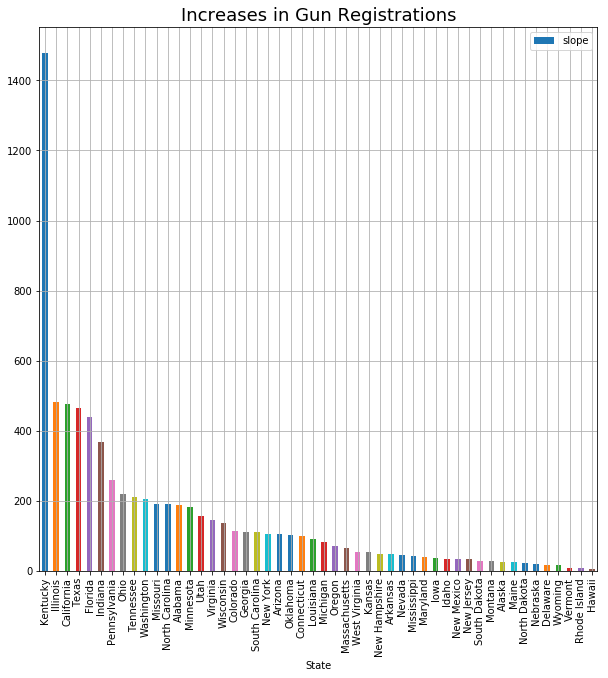

In [589]:
#which states had the highest growth in gun registrations

#find slope of each state's line of best fit
list50 = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

all_50 = 0
fifty_slopes = pd.DataFrame(columns=['state', 'slope', 'intercept'])
i = 0
for j in fifty_slopes:
    while i < 50:
        current_state = guns[guns['state'] == list50[i]]
        state = current_state.groupby('month').totals.mean()
        state = state.rolling(window=12).mean()
        state = state.dropna()
        state = pd.DataFrame(data = state)
        state = state.reset_index()
        state['numbers'] = state.index+1
        #fifty_slopes[list50[i]] = [np.polyfit(state.numbers, state.totals, deg=1)[0], 
        #                           np.polyfit(state.numbers, state.totals, deg=1)[1]]
        #df.loc[i] = [np.random.randint(-1,1) for n in range(3)]
        fifty_slopes.loc[i] = [list50[i], np.polyfit(state.numbers, state.totals, deg=1)[0],
                              np.polyfit(state.numbers, state.totals, deg=1)[1]]
        i += 1

fifty_slopes = fifty_slopes.sort_values(by='slope', ascending= False)

fifty_slopes['Rank'] = fifty_slopes.slope.rank(ascending = False, numeric_only = None)
fifty_slopes.plot(x = 'state', y = 'slope', kind = 'bar');
plt.ylabel = ('Avg Guns Per Month');
plt.grid();
plt.title('Increases in Gun Registrations', fontsize=18)
plt.xlabel('State')
plt.ylabel('Average Guns Purchased Per Month')

TypeError: 'str' object is not callable

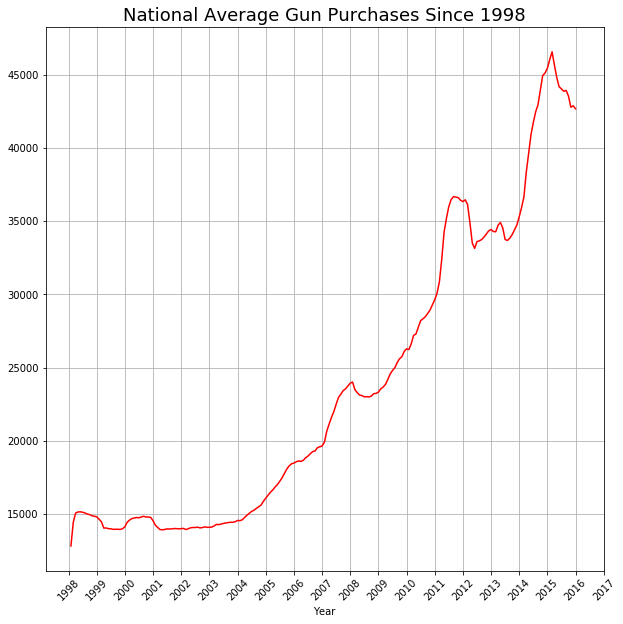

In [588]:
plt.plot(avg_guns.numerical, avg_guns.totals, label = 'National', color = 'red');
#usa_lobf = np.polyfit(avg_guns.numerical, avg_guns.totals, deg = 1)
#plt.plot(avg_guns.numerical, np.polyval(usa_lobf, avg_guns.numerical),color = 'red', linestyle = 'dashed', label = 'National Trend');
num_months=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228]
years = ['1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006','2007','2008','2009', '2010','2011','2012','2013','2014','2015','2016','2017']
plt.xticks(num_months, years, rotation = 45);
plt.grid()
plt.title('National Average Gun Purchases Since 1998', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Number of Guns Purchased that Year')

In [ ]:
guns_final.plot(x = '', y = '', kind = '');